Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



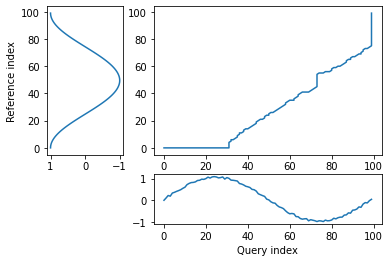

In [ ]:
## A noisy sine wave as query
!pip install dtw-python
import numpy as np
idx = np.linspace(0,6.28,num=100)
query = np.sin(idx) + np.random.uniform(size=100)/10.0

## A cosine is for template; sin and cos are offset by 25 samples
template = np.cos(idx)

## Find the best match with the canonical recursion formula
from dtw import *
alignment = dtw(query, template, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")

In [ ]:
!pip install librosa

In [ ]:
!pip install scipy

In [ ]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
import librosa
import scipy
from scipy.signal import hann
from scipy.fftpack import rfft
import librosa
import librosa.display
import matplotlib


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
x_1, fs = librosa.load('/content/drive/MyDrive/1.mp3', sr=None)


In [ ]:
x_2, fs = librosa.load('/content/drive/MyDrive/2.mp3', sr=None)

/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [ ]:
x_2, fs = librosa.load('/content/drive/MyDrive/1.mp3', sr=None)

/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Instrument voicee

In [ ]:
x_1, fs = librosa.load('/content/drive/MyDrive/voice1.wav', sr=None)

In [ ]:
x_2, fs = librosa.load('/content/drive/MyDrive/voice2.wav', sr=None)

My voice

In [ ]:
x_1, fs = librosa.load('/content/drive/MyDrive/records.wav', sr=None)

In [ ]:
x_2, fs = librosa.load('/content/drive/MyDrive/records2.wav', sr=None)

**Librosa Library to read audio.**

[link text](https://)Burdan basladim

What is DTW

Dynamic Time Warping(DTW) is an algorithm for measuring similarity between two temporal sequences which may vary in speed. For instance, similarities in walking could be detected using DTW, even if one person was walking faster than the other, or if there were accelerations and decelerations during the course of an observation. It can be used to match a sample voice command with others command, even if the person talks faster or slower than the prerecorded sample voice.


In music, the term chroma feature or chromagram closely relates to the twelve different pitch classes. Chroma-based features, which are also referred to as “pitch class profiles”, are a powerful tool for analyzing music whose pitches can be meaningfully categorized (often into twelve categories) and whose tuning approximates to the equal-tempered scale. One main property of chroma features is that they capture harmonic and melodic characteristics of music, while being robust to changes in timbre and instrumentation.


In [ ]:
n_fft = 4410
hop_size = 2205

x_1_chroma = librosa.feature.chroma_stft(y=x_1, sr=fs, tuning=0, norm=2,
                                         hop_length=hop_size, n_fft=n_fft)
x_2_chroma = librosa.feature.chroma_stft(y=x_2, sr=fs, tuning=0, norm=2,
                                         hop_length=hop_size, n_fft=n_fft)



In [ ]:
x_2, fs = librosa.load('/content/drive/MyDrive/deneme.mp3', sr=None)

In [ ]:

librosa.feature.chroma_stft(y=x_2, sr=fs)

array([[0.        , 0.        , 0.        , ..., 0.11545638, 0.19787849,
        0.48909135],
       [0.        , 0.        , 0.        , ..., 0.01617161, 0.07443927,
        0.32636248],
       [0.        , 0.        , 0.        , ..., 0.06773843, 0.1776575 ,
        0.24130268],
       ...,
       [0.        , 0.        , 0.        , ..., 0.0219635 , 0.06182875,
        0.26685336],
       [0.        , 0.        , 0.        , ..., 0.0592905 , 0.12803592,
        0.36933281],
       [0.        , 0.        , 0.        , ..., 0.3784857 , 0.46394069,
        0.61516824]])

In [ ]:
S = np.abs(librosa.stft(y))
chroma = librosa.feature.chroma_stft(S=S, sr=fs)

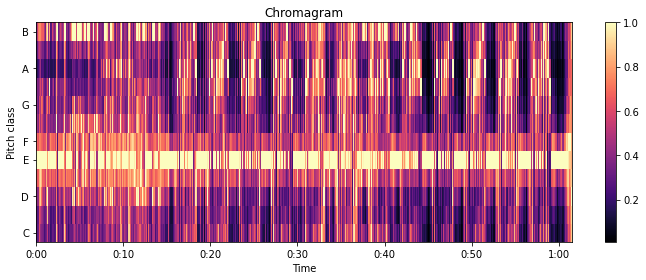

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

In [ ]:

def dtw_table(x, y, distance=None):
    if distance is None:
        distance = scipy.spatial.distance.euclidean
    nx = len(x)
    ny = len(y)
    table = np.zeros((nx+1, ny+1))
    
    # Compute left column separately, i.e. j=0.
    table[1:, 0] = np.inf
        
    # Compute top row separately, i.e. i=0.
    table[0, 1:] = np.inf
        
    # Fill in the rest.
    for i in range(1, nx+1):
        for j in range(1, ny+1):
            d = distance(x[i-1], y[j-1])
            table[i, j] = d + min(table[i-1, j], table[i, j-1], table[i-1, j-1])
    return table

In [ ]:
D = dtw_table(x_1_chroma.T, x_2_chroma.T, distance=scipy.spatial.distance.cosine)
D

array([[0.00000000e+00,            inf,            inf, ...,
                   inf,            inf,            inf],
       [           inf, 1.80383737e-02, 2.01202503e-01, ...,
        1.71968342e+01, 1.75760170e+01, 1.79238581e+01],
       [           inf, 2.74637896e-01, 4.09741961e-01, ...,
        1.74287471e+01, 1.78290879e+01, 1.81175261e+01],
       ...,
       [           inf, 2.41982174e+01, 2.44022074e+01, ...,
        4.06034924e+00, 4.04612748e+00, 4.01463119e+00],
       [           inf, 2.42490268e+01, 2.43968400e+01, ...,
        4.44864141e+00, 4.44377440e+00, 4.37085878e+00],
       [           inf, 2.43853538e+01, 2.45848777e+01, ...,
        4.92096147e+00, 4.92835601e+00, 4.81176186e+00]])

In [ ]:
D.shape

(61, 44)

In [ ]:

def compute_optimal_warping_path(D):
   
    N = D.shape[0]
    M = D.shape[1]
    n = N - 1
    m = M - 1
    P = [(n, m)]
    while n > 0 or m > 0:
        if n == 0:
            cell = (0, m - 1)
        elif m == 0:
            cell = (n - 1, 0)
        else:
            val = min(D[n-1, m-1], D[n-1, m], D[n, m-1])
            if val == D[n-1, m-1]:
                cell = (n-1, m-1)
            elif val == D[n-1, m]:
                cell = (n-1, m)
            else:
                cell = (n, m-1)
        P.append(cell)
        (n, m) = cell
    P.reverse()
    return np.array(P)
        
P = compute_optimal_warping_path(D)
print('Optimal warping path P =', P.tolist())

Optimal warping path P = [[0, 0], [1, 1], [1, 2], [2, 3], [3, 3], [4, 4], [5, 5], [6, 5], [7, 6], [8, 7], [9, 8], [10, 9], [11, 10], [12, 10], [13, 11], [14, 12], [15, 12], [16, 13], [17, 14], [18, 15], [19, 16], [20, 17], [21, 17], [22, 17], [23, 18], [24, 18], [25, 19], [26, 20], [27, 20], [28, 21], [29, 22], [30, 23], [31, 24], [32, 24], [33, 24], [34, 25], [35, 26], [36, 26], [37, 27], [38, 28], [38, 29], [39, 30], [40, 30], [41, 30], [42, 31], [43, 32], [44, 33], [45, 34], [46, 35], [47, 35], [48, 36], [49, 37], [50, 38], [51, 39], [52, 39], [53, 40], [54, 41], [55, 42], [56, 42], [57, 42], [58, 43], [59, 43], [60, 43]]


In [ ]:
D[-1,-1]

82.07015201449394

In [ ]:
def distance_calculate(path,D):
  values=[]
  for points in path:
    x=D[points[0],points[1]]
   
    values.append(x)

    distance=sum(values)/len(path)
  return distance
    


In [ ]:
distance_calculate(P,D)

15.365642993266249

ValueError: ignored

In [ ]:
def get_total_points(pieces):
  total = 0
  for i in pieces:
    length = len(i)
    if length >= 0:
      total += length
  
  return total

In [ ]:
first,second=P[0]

counter=0

for i in range(1,len(P)):
    if P[i][0]==first+1 and P[i][1]== second+1:
        counter+=1
        first,second=P[i]
    else:
        first,second=P[i]
print(counter/len(P)*100)

65.07936507936508


In [ ]:
print(f"Total intersected point {get_total_points(pieces)}")
print(f"Similarity rate: {round(get_total_points(pieces)/len(P.tolist())*100, 2)}%")

NameError: ignored

In [ ]:
! pip install dtaidistance

(<Figure size 720x720 with 4 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f28a7128f60>])

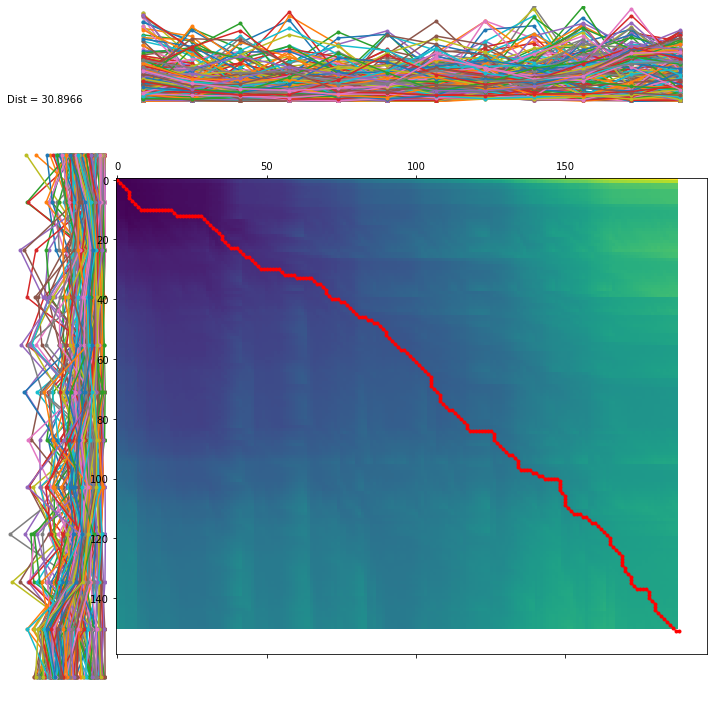

In [ ]:

from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

dtwvis.plot_warpingpaths(x_1_chroma, x_2_chroma, D, P)

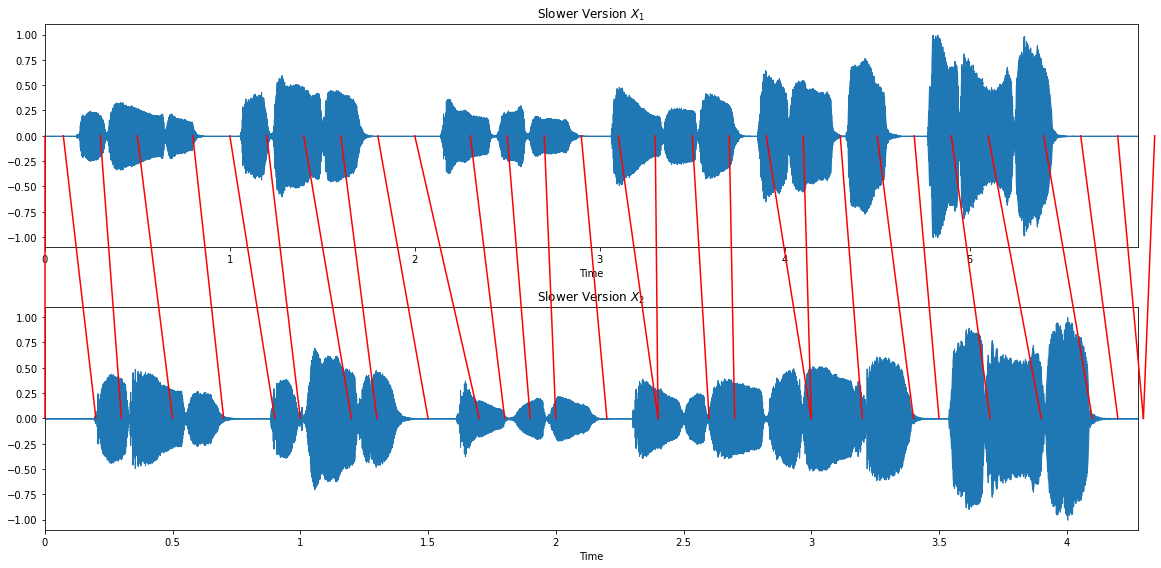

In [ ]:
fig = plt.figure(figsize=(16, 8))

# Plot x_1
plt.subplot(2, 1, 1)
librosa.display.waveplot(x_1, sr=fs)
plt.title('Slower Version $X_1$')
ax1 = plt.gca()

# Plot x_2
plt.subplot(2, 1, 2)
librosa.display.waveplot(x_2, sr=fs)
plt.title('Slower Version $X_2$')
ax2 = plt.gca()

plt.tight_layout()

trans_figure = fig.transFigure.inverted()
lines = []
arrows = 30
points_idx = np.int16(np.round(np.linspace(0, P.shape[0] - 1, arrows)))

# for tp1, tp2 in zip((wp[points_idx, 0]) * hop_size, (wp[points_idx, 1]) * hop_size):
for tp1, tp2 in P[points_idx] * hop_size / fs:
    # get position on axis for a given index-pair
    coord1 = trans_figure.transform(ax1.transData.transform([tp1, 0]))
    coord2 = trans_figure.transform(ax2.transData.transform([tp2, 0]))

    # draw a line
    line = matplotlib.lines.Line2D((coord1[0], coord2[0]),
                                   (coord1[1], coord2[1]),
                                   transform=fig.transFigure,
                                   color='r')
    lines.append(line)

fig.lines = lines
plt.tight_layout()

Buraya kadar

In [ ]:
# Read with librosa
x1, Fs1 = librosa.load('/content/drive/MyDrive/ses1.mp3', sr=None) # audio 1
x2, Fs2 = librosa.load('/content/drive/MyDrive/ses2.mp3', sr=None) # audio 2

In [ ]:
print(f"X1: {x1}\nX2: {x2}")
print(f"Shape of x1: {x1.shape} and x2: {x2.shape}")
print(f"Fs1: {Fs1} and FS2: {Fs2}")

X1: [0. 0. 0. ... 0. 0. 0.]
X2: [ 0.          0.          0.         ... -0.00021362 -0.00015259
 -0.00012207]
Shape of x1: (192384,) and x2: (95616,)
Fs1: 48000 and FS2: 48000


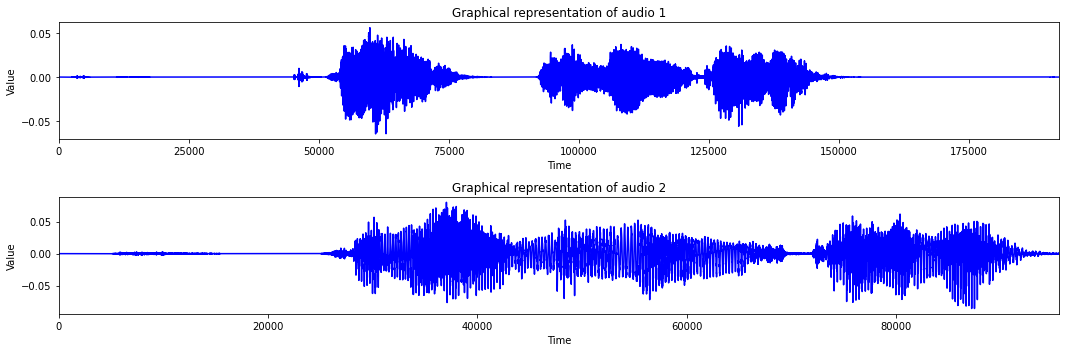

In [ ]:
# Visualize audio graphs
plt.figure(figsize=(15, 5))
plt.subplot(211)
plt.xlim([0, x1.shape[0]])
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Graphical representation of audio 1")
plt.plot(x1, color="blue", label="Audio 1")
plt.subplot(212)
plt.xlim([0, x2.shape[0]])
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Graphical representation of audio 2")
plt.plot(x2, color="blue", label="Audio 2")
plt.tight_layout()

**Let's use scipy to read audio this time**

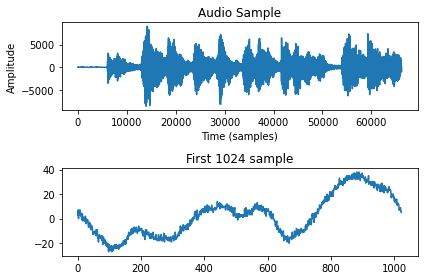

In [ ]:
# Using Scipy wav reader
input_data = read("audio.wav")
audio = input_data[1]
# plot the first 1024 samples
plt.subplot(211)
plt.plot(audio)
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time (samples)")# set the title
plt.title("Audio Sample")
plt.subplot(212)
plt.plot(audio[0:1024])
plt.title("First 1024 sample")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.log10 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log10 instead
  


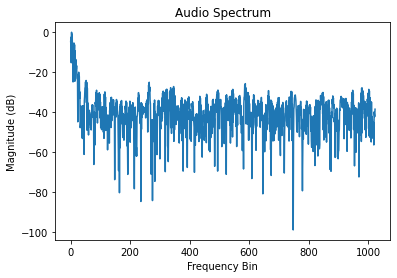

In [ ]:
# Decibal spectrum with scipy
# apply a Hanning window
window = hann(1024)
audio = audio[0:1024]*window
# fft
mags = abs(rfft(audio))
# convert to dB
mags = 20*scipy.log10(mags)
# normalise to 0 dB max
mags -= max(mags)
# plot
plt.plot(mags)
# label the axes
plt.ylabel("Magnitude (dB)")
plt.xlabel("Frequency Bin")
# set the title
plt.title("Audio Spectrum")
plt.show()

In [ ]:
# DWT Matrix function
def dtw(s, t, window):
    n, m = len(s), len(t)
    w = np.max([window, abs(n-m)])
    dtw_matrix = np.zeros((n+1, m+1))
    
    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
            dtw_matrix[i, j] = 0
    
    for i in range(1, n+1):
        for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
            cost = abs(s[i-1] - t[j-1])
            # take last min from a square box
            last_min = np.min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min
    return dtw_matrix

<h1>Burdan ben yazdigim geliyor</h1>

In [ ]:
!pip install dtaidistance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
import librosa
import scipy
from scipy.signal import hann
from scipy.fftpack import rfft
import librosa
import librosa.display
import matplotlib
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

from google.colab import drive
drive.mount('/content/drive')

def dtw_table(x, y, distance=None):
    if distance is None:
        distance = scipy.spatial.distance.euclidean
    nx = len(x)
    ny = len(y)
    table = np.zeros((nx+1, ny+1))
    
    # Compute left column separately, i.e. j=0.
    table[1:, 0] = np.inf
        
    # Compute top row separately, i.e. i=0.
    table[0, 1:] = np.inf
        
    # Fill in the rest.
    for i in range(1, nx+1):
        for j in range(1, ny+1):
            d = distance(x[i-1], y[j-1])
            table[i, j] = d + min(table[i-1, j], table[i, j-1], table[i-1, j-1])
    return table


def compute_optimal_warping_path(D):
   
    N = D.shape[0]
    M = D.shape[1]
    n = N - 1
    m = M - 1
    P = [(n, m)]
    while n > 0 or m > 0:
        if n == 0:
            cell = (0, m - 1)
        elif m == 0:
            cell = (n - 1, 0)
        else:
            val = min(D[n-1, m-1], D[n-1, m], D[n, m-1])
            if val == D[n-1, m-1]:
                cell = (n-1, m-1)
            elif val == D[n-1, m]:
                cell = (n-1, m)
            else:
                cell = (n, m-1)
        P.append(cell)
        (n, m) = cell
    P.reverse()
    return np.array(P)


def distance_calculate(path,D):
  values=[]
  for points in path:
    x=D[points[0],points[1]]
   
    values.append(x)

    distance=sum(values)/len(path)
  return distance



# Read from drive
import os
import pandas as pd
import time

BASE_DIR = "/content/drive/MyDrive/audio"

os.chdir(BASE_DIR)

categories = os.listdir()

audio_files = {}

report = [
    ['Audio 1', 'Audio 2', 'Genre', 'Distance', 'Running Time', 'Path'],
]



for cat in categories:
  os.chdir(f'{BASE_DIR}/{cat}')
  audios = os.listdir()
  audio_files[cat] = list(audios)
  print(f"{cat} has {len(audios)} audio file.")

plt.figure(figsize=(15, 5))
# get audio from each category
for i in audio_files:
  print(f"Genre {i}:")
  for j in range(0, len(audio_files[i]), 2):
    start = time.time()
    x_1, fs = librosa.load(f'{BASE_DIR}/{i}/{audio_files[i][j]}', sr=None)
    x_2, fs = librosa.load(f'{BASE_DIR}/{i}/{audio_files[i][j+1]}', sr=None)

    # Extracting audio signal features
    n_fft = 4410
    hop_size = 2205
    x_1_chroma = librosa.feature.chroma_stft(y=x_1, sr=fs, tuning=0, norm=2,
                                            hop_length=hop_size, n_fft=n_fft)
    x_2_chroma = librosa.feature.chroma_stft(y=x_2, sr=fs, tuning=0, norm=2,
                                            hop_length=hop_size, n_fft=n_fft)
    print(f"Comparing {audio_files[i][j]} and {audio_files[i][j+1]}")
    

    D = dtw_table(x_1_chroma.T, x_2_chroma.T, distance=scipy.spatial.distance.cosine)

    P = compute_optimal_warping_path(D)
    p_list = P.tolist()
    distance = distance_calculate(p_list, D)
    end = time.time()
    new_entry = [audio_files[i][j], audio_files[i][j+1], i, distance, end-start, p_list]
    report.append(new_entry)

df = pd.DataFrame(report)    
df.head()
# Read from drive

columns= df.iloc[0]
df = df[1:]
df.columns=columns
df.head()


     |████████████████████████████████| 942kB 13.4MB/s 
  Created wheel for dtaidistance: filename=dtaidistance-2.2.1-cp36-cp36m-linux_x86_64.whl size=1541290 sha256=6c991c4748c2b6c095e66568dd92239ab0ce8e6078202d2aba8916e6a09b2fd6
  Stored in directory: /root/.cache/pip/wheels/9b/bf/fc/302b9aa1feddf05fdaa54f246b24aa30c0ba5262fa626153cd
Successfully built dtaidistance
Mounted at /content/drive
Alternate has 58 audio file.
Blues has 30 audio file.
Electronic has 88 audio file.
funksoulrnb has 46 audio file.
Jazz has 124 audio file.
Rock has 76 audio file.
Rap has 74 audio file.
Genre Alternate:
Comparing Abigail_Lapell-Dress_Rehearsal.mp3 and Albino_Catfish-Ice_Cream.mp3
Comparing Alex_Niedt-But_I_Love_You___.mp3 and Anders_Tengdahl-I_came_here_to_see_you.mp3
Comparing Anders_Tengdahl-When_You_Cry.mp3 and hayes-Asinimaha.mp3
Comparing Cabrini-Winter_2000.mp3 and cellophane_rain-orchid.mp3
Comparing Chance_-Say_What_You_Will.mp3 and Circle_the_Square-CPU.mp3
Comparing Common_Thrill-Morphi

,Audio 1,Audio 2,Genre,Distance,Running Time,Path
1,Abigail_Lapell-Dress_Rehearsal.mp3,Albino_Catfish-Ice_Cream.mp3,Alternate,41.6382,4.35898,"[[0, 0], [1, 1], [2, 2], [3, 3], [4, 4], [5, 4..."
2,Alex_Niedt-But_I_Love_You___.mp3,Anders_Tengdahl-I_came_here_to_see_you.mp3,Alternate,28.5333,3.09978,"[[0, 0], [1, 1], [2, 1], [3, 1], [4, 1], [5, 1..."
3,Anders_Tengdahl-When_You_Cry.mp3,hayes-Asinimaha.mp3,Alternate,25.4635,3.12292,"[[0, 0], [1, 1], [2, 2], [3, 2], [4, 2], [5, 3..."
4,Cabrini-Winter_2000.mp3,cellophane_rain-orchid.mp3,Alternate,23.9761,3.04293,"[[0, 0], [1, 1], [2, 2], [3, 2], [4, 2], [5, 2..."
5,Chance_-Say_What_You_Will.mp3,Circle_the_Square-CPU.mp3,Alternate,22.4011,3.14502,"[[0, 0], [1, 1], [2, 1], [3, 1], [4, 1], [5, 1..."


<Figure size 1080x360 with 0 Axes>

Number of genres =  7


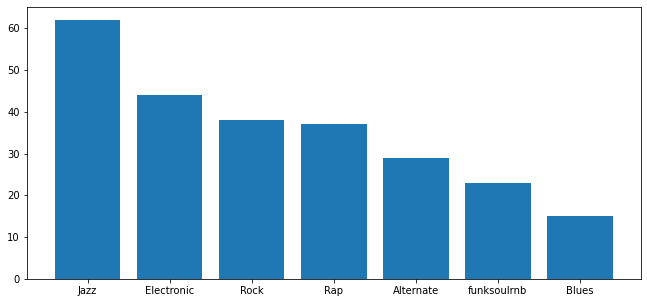

In [ ]:
# Visualization stuff
num_genre = df["Genre"].unique().shape[0]
print('Number of genres = ', num_categories)

# Count the number of apps in each 'Category'. Sort in descending order depending on number of apps in each category
num_comparison_in_genre = df["Genre"].value_counts()
fig, axs = plt.subplots(figsize=(11, 5), sharey=True)
plt.bar(dict(num_comparison_in_genre).keys(), dict(num_comparison_in_genre).values())
plt.show()

In [ ]:
df['Distance'] = df['Distance'].astype(float)
df['Running Time'] = df['Running Time'].astype(float)

In [ ]:
import seaborn as sns
# visualize average running time and distance for each category
# df[df['Genre']=='Rap']['Distance'].hist()
a = df.groupby('Genre').agg({'Distance': ['mean', 'min', 'max']})
print("Minimum Maximum and Mean distance for each genre of audio based on our test")
print(a)

#==============================
b = df.groupby('Genre').agg({'Running Time': ['mean', 'min', 'max']})
print("\nMinimum Maximum and Mean Running Time for each genre of audio based on our test")
print(b)
#==============================

Minimum Maximum and Mean distance for each genre of audio based on our test
              Distance                      
                  mean        min        max
Genre                                       
Alternate    29.690435  17.585417  55.633175
Blues        31.143393  21.819273  41.326052
Electronic   27.819804  11.733574  50.261814
Jazz         34.664869  21.435924  55.631630
Rap          25.373154  17.085958  38.915742
Rock         24.503906  16.936822  42.427653
funksoulrnb  27.923062  20.808604  41.511642

Minimum Maximum and Mean Running Time for each genre of audio based on our test
            Running Time                    
                    mean       min       max
Genre                                       
Alternate       3.176854  3.029165  4.358979
Blues           3.147888  3.084725  3.223925
Electronic      3.144996  3.072368  3.342242
Jazz            3.131908  3.039770  3.232092
Rap             3.162747  3.053084  3.405869
Rock            3.150789  3.06844

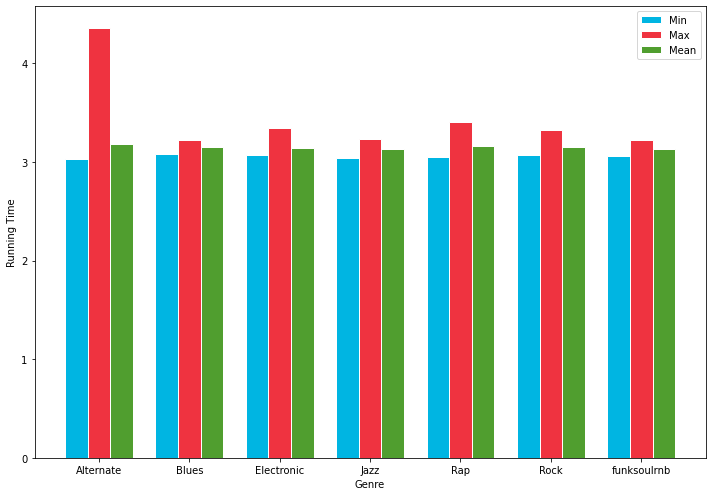

In [ ]:
barWidth = 0.25
fig, ax = plt.subplots(figsize=(10,7))
# set height of bar
bars1 = list(dict(b[('Running Time', 'min')]).values())
bars2 = list(dict(b[('Running Time', 'max')]).values())
bars3 = list(dict(b[('Running Time', 'mean')]).values())
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#00b5e2', width=barWidth, edgecolor='white', label='Min')
plt.bar(r2, bars2, color='#ef3340', width=barWidth, edgecolor='white', label='Max')
plt.bar(r3, bars3, color='#509e2f', width=barWidth, edgecolor='white', label='Mean')
 
# Add xticks on the middle of the group bars
plt.xlabel('Genre')
plt.ylabel('Running Time')
plt.xticks([r + barWidth for r in range(len(bars1))], list(dict(b[('Running Time', 'min')]).keys()))
plt.tight_layout()

# Create legend & Show graphic
plt.legend()
plt.show()

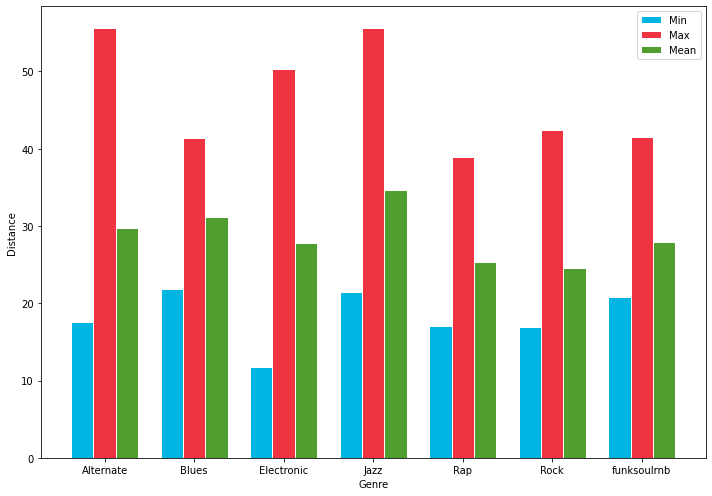

In [ ]:
barWidth = 0.25
fig, ax = plt.subplots(figsize=(10,7))
# set height of bar
bars1 = list(dict(a[('Distance', 'min')]).values())
bars2 = list(dict(a[('Distance', 'max')]).values())
bars3 = list(dict(a[('Distance', 'mean')]).values())
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#00b5e2', width=barWidth, edgecolor='white', label='Min')
plt.bar(r2, bars2, color='#ef3340', width=barWidth, edgecolor='white', label='Max')
plt.bar(r3, bars3, color='#509e2f', width=barWidth, edgecolor='white', label='Mean')
 
# Add xticks on the middle of the group bars
plt.xlabel('Genre')
plt.ylabel('Distance')
plt.xticks([r + barWidth for r in range(len(bars1))], list(dict(a[('Distance', 'min')]).keys()))
plt.tight_layout()

# Create legend & Show graphic
plt.legend()
plt.show()

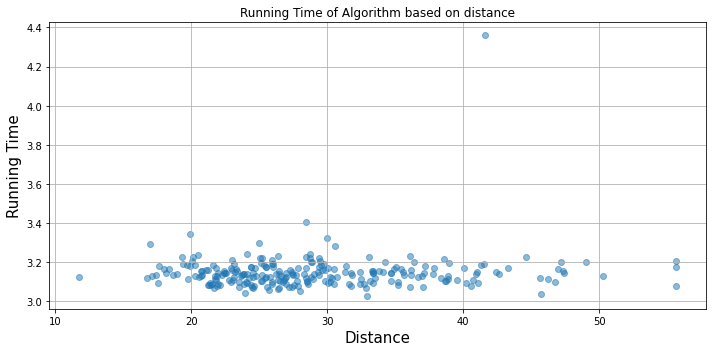

In [ ]:
# visualize scatter plot runtime and distance
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df['Distance'], df['Running Time'], alpha=0.5)

ax.set_xlabel('Distance', fontsize=15)
ax.set_ylabel('Running Time', fontsize=15)
ax.set_title('Running Time of Algorithm based on distance')

ax.grid(True)

fig.tight_layout()

Useful links<br/>
Reading:<br/>
http://mural.maynoothuniversity.ie/4115/1/40.pdf
<br/>
https://www.audiolabs-erlangen.de/resources/MIR/FMP/B/B_PythonAudio.html